# Kredi Kartı Dolandırıcılık Verisi – Veri Temizleme (Data Cleaning)

Bu notebook, `creditcard.csv` veri seti üzerinde **veri temizleme** adımlarını içermektedir.  
Amaç, modelleme aşamasına geçmeden önce:

- Eksik değerleri incelemek,
- Yinelenen (duplicate) satırları kontrol etmek,
- Uç değerleri (outlier) analiz etmek,
- Gerekli sütun dönüşümlerini ve ölçeklendirmeyi yapmak,
- Temizlenmiş veriyi `data/processed/creditcard_clean.csv` dosyasına kaydetmektir.

Bu notebook **sadece veri temizleme içindir**.  
Model eğitimi her grup üyesi tarafından kendi notebook'unda yapılacaktır.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.preprocessing import StandardScaler

# Grafik ayarları
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

# Proje kök dizini (notebook proje klasöründe çalışıyorsa)
BASE = Path(".").resolve()

RAW_PATH = BASE / "data" / "raw" / "creditcard.csv"
PROCESSED_DIR = BASE / "data" / "processed"
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

print("Ham veri yolu :", RAW_PATH)
print("İşlenmiş veri klasörü :", PROCESSED_DIR)

# Veri setini yükleme
df = pd.read_csv(RAW_PATH)
df.head()


Ham veri yolu : C:\Users\Administrator\Desktop\fraud-detection-win-ar\data\raw\creditcard.csv
İşlenmiş veri klasörü : C:\Users\Administrator\Desktop\fraud-detection-win-ar\data\processed


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. Veri Setine Genel Bakış

Bu bölümde:

- Satır ve sütun sayısı,
- Sütun türleri (dtype),
- İlk ve son gözlemler,

incelenecektir.


In [2]:
print("Satır sayısı :", df.shape[0])
print("Sütun sayısı:", df.shape[1])

print("\n--- info() ---")
df.info()

print("\n--- İlk 5 gözlem ---")
display(df.head())

print("\n--- Son 5 gözlem ---")
display(df.tail())


Satır sayısı : 284807
Sütun sayısı: 31

--- info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float6

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



--- Son 5 gözlem ---


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 2. Eksik Değer Analizi

Öncelikle her sütundaki eksik değer sayısını kontrol edelim.  
Kredi kartı dolandırıcılık verisinde genelde eksik değer yoktur, ama yine de doğrulamak önemlidir.


In [3]:
missing_counts = df.isnull().sum()
missing_ratio = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    "eksik_sayi": missing_counts,
    "eksik_oran_%": missing_ratio.round(4)
})

print("Eksik değer özeti:")
display(missing_df)

# Eğer eksik yoksa sadece bilgi ver
if missing_counts.sum() == 0:
    print("Bu veri setinde eksik değer bulunmamaktadır.")
else:
    print("Eksik değer tespit edildi, ilgili sütunlarda işlem yapılmalıdır.")


Eksik değer özeti:


,eksik_sayi,eksik_oran_%
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


Bu veri setinde eksik değer bulunmamaktadır.


## 3. Yinelenen (Duplicate) Satırlar

Veri setinde aynı gözlemin birden fazla kez bulunması model performansını bozabilir.
Bu nedenle duplicate kayıtları kontrol edip gerekirse sileceğiz.


In [4]:
dup_count = df.duplicated().sum()
print("Yinelenen satır sayısı:", dup_count)

if dup_count > 0:
    df = df.drop_duplicates()
    print("Yinelenen satırlar silindi. Yeni satır sayısı:", df.shape[0])
else:
    print("Yinelenen satır bulunmamaktadır.")


Yinelenen satır sayısı: 1081
Yinelenen satırlar silindi. Yeni satır sayısı: 283726


## 4. Temel İstatistikler ve Sınıf Dağılımı

Bu bölümde:

- Sayısal değişkenler için özet istatistikler,
- Hedef değişken `Class` için sınıf dağılımı,

incelenir.


Sayısal değişkenler için özet istatistikler:


,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995



Hedef değişken (Class) dağılımı:


,adet,oran_%
Class,,
0,283253,99.8333
1,473,0.1667


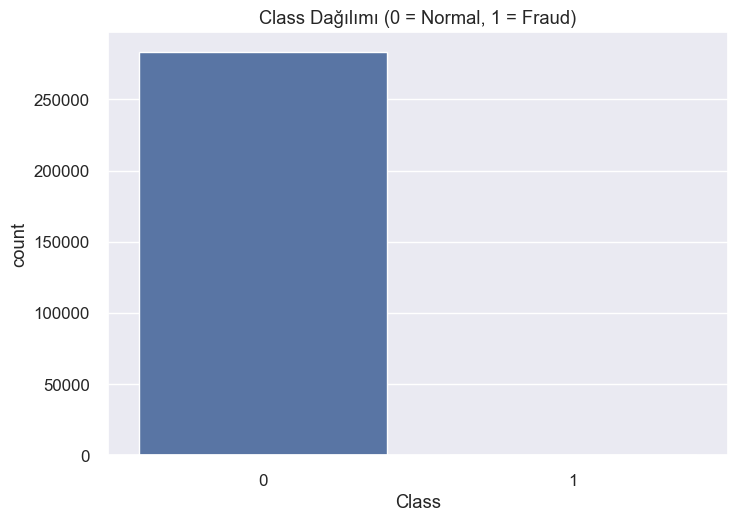

In [5]:
print("Sayısal değişkenler için özet istatistikler:")
display(df.describe().T)

print("\nHedef değişken (Class) dağılımı:")
class_counts = df["Class"].value_counts()
class_ratio = (class_counts / len(df)) * 100
class_summary = pd.DataFrame({
    "adet": class_counts,
    "oran_%": class_ratio.round(4)
})
display(class_summary)

sns.countplot(x="Class", data=df)
plt.title("Class Dağılımı (0 = Normal, 1 = Fraud)")
plt.show()


## 5. Korelasyon Analizi

Kredi kartı veri setinde birçok anonimleştirilmiş (V1, V2, ..., V28) özellik vardır.
Tam korelasyon matrisi görselleştirmek pahalı olabileceği için:

- Küçük bir alt küme,
veya
- Sadece `Amount`, `Time` ve birkaç V değişkeni

üzerinde ısı haritası çizilebilir.


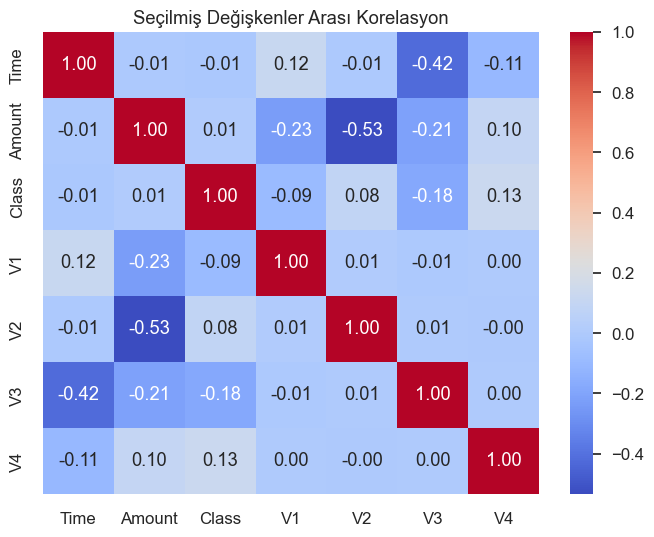

In [6]:
# Örnek: Sadece bazı sütunlar için korelasyon
cols_for_corr = ["Time", "Amount", "Class"] + [f"V{i}" for i in range(1, 5)]
subset = df[cols_for_corr]

plt.figure(figsize=(8, 6))
sns.heatmap(subset.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Seçilmiş Değişkenler Arası Korelasyon")
plt.show()


## 6. Uç Değer (Outlier) İncelemesi

Bu veri setinde özellikle **Amount** ve bazı V değişkenlerinde uç değerler olabilir.  
Öncelikle `Amount` ve `Time` için kutu grafikleri (boxplot) çizelim.


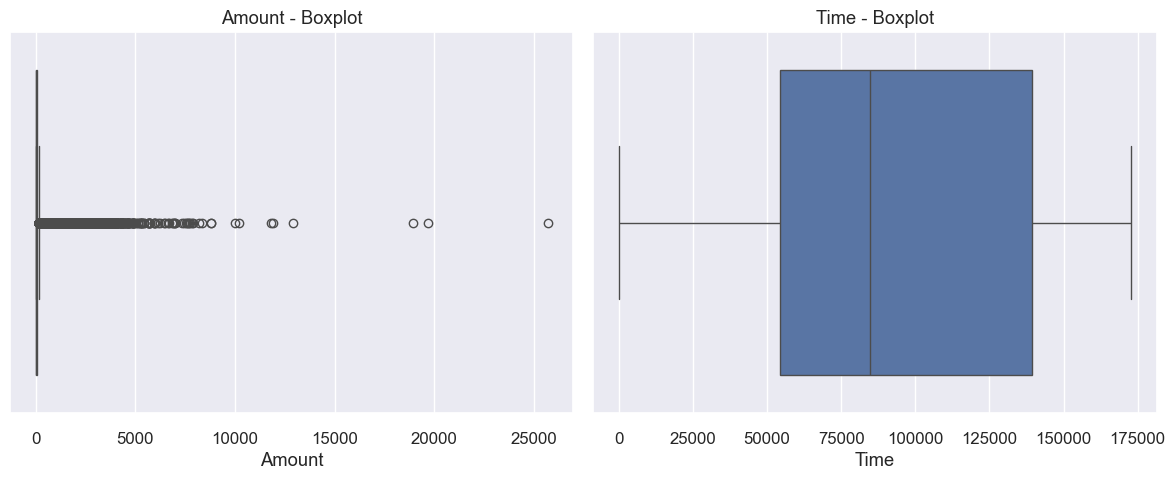

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Amount"])
plt.title("Amount - Boxplot")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Time"])
plt.title("Time - Boxplot")

plt.tight_layout()
plt.show()


## 7. Özellik Ölçeklendirme (Scaling)

Modelleme aşamasında ölçek farklılıklarının etkisini azaltmak için:

- `Amount` ve `Time` değişkenlerini **StandardScaler** ile ölçekleyip,
- Yeni sütunlar olarak ekleyip (ör: `Amount_scaled`, `Time_scaled`),

ham sütunları da isterseniz tutabiliriz.


In [10]:
scaler = StandardScaler()

df["Amount_scaled"] = scaler.fit_transform(df[["Amount"]])
df["Time_scaled"] = scaler.fit_transform(df[["Time"]])

df[["Amount", "Amount_scaled", "Time", "Time_scaled"]].head()


,Amount,Amount_scaled,Time,Time_scaled
0,149.62,0.244200,0.0,-1.996823
1,2.69,-0.342584,0.0,-1.996823
2,378.66,1.158900,1.0,-1.996802
3,123.50,0.139886,1.0,-1.996802
4,69.99,-0.073813,2.0,-1.996781


## 8. Son Kontroller

Temizlenen veri üzerinde:

- Eksik değer,
- Yinelenen satır,

kontrollerini son kez yapalım.


In [11]:
print("Eksik değer toplamı:", df.isnull().sum().sum())
print("Yinelenen satır sayısı:", df.duplicated().sum())
print("Son veri şekli (satır, sütun):", df.shape)


Eksik değer toplamı: 0
Yinelenen satır sayısı: 0
Son veri şekli (satır, sütun): (283726, 33)


## 9. Temiz Veriyi Kaydetme

Artık veri temizleme adımlarımız tamamlandı.  
Bu aşamada:

- Temizlenmiş veri setini `data/processed/creditcard_clean.csv` olarak kaydediyoruz.
- Diğer grup üyeleri **model eğitiminde** bu dosyayı kullanacaktır.


In [12]:
output_path = PROCESSED_DIR / "creditcard_clean.csv"
df.to_csv(output_path, index=False, encoding="utf-8")
print("Temiz veri kaydedildi →", output_path)


Temiz veri kaydedildi → C:\Users\Administrator\Desktop\fraud-detection-win-ar\data\processed\creditcard_clean.csv


## 10. Özet

Bu notebook'ta yapılan başlıca adımlar:

1. `creditcard.csv` veri seti yüklendi.  
2. Eksik değerler ve veri türleri incelendi.  
3. Yinelenen satırlar (varsa) kaldırıldı.  
4. Hedef değişken `Class` için sınıf dağılımı incelendi.  
5. Seçilmiş değişkenler için korelasyon analizi yapıldı.  
6. `Amount` ve `Time` için uç değerler görselleştirildi.  
7. `Amount` ve `Time` özellikleri **StandardScaler** ile ölçeklendirildi.  
8. Temizlenmiş veri `data/processed/creditcard_clean.csv` dosyasına kaydedildi.

Artık her grup üyesi, kendi model notebook'unda şu şekilde veriyi kullanabilir:

```python
import pandas as pd
df = pd.read_csv("data/processed/creditcard_clean.csv")
